In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Number of training points is {0}".format(x_train.shape[0]))
print("Number of testing points is {0}".format(x_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
Number of training points is 60000
Number of testing points is 10000


Class label for 0th datapoint is 5


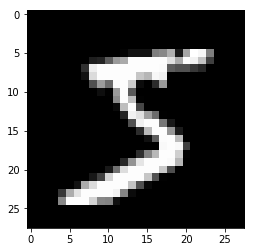

In [4]:
%matplotlib inline
print("Class label for 0th datapoint is {0}".format(y_train[0]))
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
from keras import backend as K
img_rows, img_cols = 28, 28

# the data, split between train and test sets
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#Normalizing data
x_train=x_train/255
x_test=x_test/255

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
#Building a 7 Convolution layer Convnet Model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Convolution2D
from keras import backend as K
from keras.initializers import he_normal

#Sequential indicates that the output of 1 layer is given as input to another layer
model_7=Sequential()

#Convolution2D is a layer which responsible of performing Convolution Operation in images.Since the initial convolution
#layers are responsible to detect horizontal and vertical edges ,More Formally initial convolution layers are responsible to
#learn low level features of an images like edge detection etc.   

model_7.add(Convolution2D(16, kernel_size=(2, 2),
                 activation='relu',
                 kernel_initializer=he_normal(seed=None),padding='same',input_shape=input_shape))

#Relu activation function is used just because the function can introduce non-linearity and can map the non linear inputs to
#outputs

model_7.add(Convolution2D(22, kernel_size=(2, 2),activation='relu'))
model_7.add(Convolution2D(28, kernel_size=(2, 2),activation='relu'))

#Max pooling layer is responsible to progressively reduce the spatial size of the representation to reduce the amount of
#parameters and computation in the network

model_7.add(MaxPooling2D(pool_size=(2, 2)))
 
model_7.add(Convolution2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model_7.add(Convolution2D(40, kernel_size=(2, 2),activation='relu'))
model_7.add(Convolution2D(50, kernel_size=(2, 2),activation='relu'))
#There are 64 kernels as this is the final convolution layer.This layer is responsible to learn various complex features 
#about the image like color of the image,facial features etc
model_7.add(Convolution2D(64, kernel_size=(2, 2),activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

#DropOut Layer is added to prevent the model from overfitting.You can think dropout as a regularization if u know abt it.
#Since if a NeuralNetwork has Fully Connected or dense layers then it has very high probability that it is going to overfit.
#Dropout layer has a parameter named Dropout rate.

model_7.add(Dropout(0.5))

#Flatten layer will output 1-D array from the Matrix

model_7.add(Flatten())
model_7.add(Dense(128, activation='relu'))

#A dense layer is added at the end of the network which is responsible to perform the actual classification task
#The activation function used here is the softmax activation function.It outputs the probabilities for each of the class.And 
#then we take maximum of the probabilities to find the actual class label

model_7.add(Dense(num_classes, activation='softmax'))

model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 27, 27, 22)        1430      
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 26, 26, 28)        2492      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 13, 13, 32)        3616      
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 12, 12, 40)        5160      
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 11, 11, 50)        8050      
__________

In [0]:
from keras.optimizers import Adagrad
model_7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_7=model_7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2129 - acc: 0.9320 - val_loss: 0.0458 - val_acc: 0.9848
Epoch 2/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0629 - acc: 0.9810 - val_loss: 0.0625 - val_acc: 0.9795
Epoch 3/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0247 - val_acc: 0.9923
Epoch 4/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0389 - acc: 0.9877 - val_loss: 0.0232 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0335 - acc: 0.9893 - val_loss: 0.0241 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0287 - acc: 0.9906 - val_loss: 0.0191 - val_acc: 0.9932
Epoch 7/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0207 - 

Test score: 0.020760127860461036
Test accuracy: 0.9939


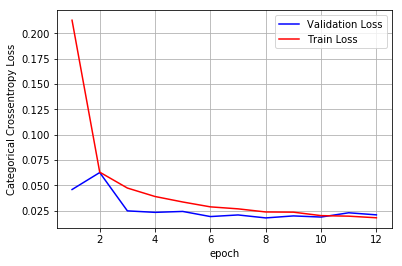

In [0]:
score = model_7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

#Training loss
vy = history_7.history['val_loss']
ty = history_7.history['loss']
plt_dynamic(x, vy, ty, ax)